## Introduction

Haven-Kings Property Management, overseeing a vast portfolio of houses in the King County area, faces a dynamic and competitive real estate market. It's undeniable that Seattle and, by extension, King County stand as prime locations for acquiring and overseeing rental assets. Savvy investors understand that while a single property in this thriving market is beneficial, expanding one's real estate holdings is the key to amplifying profits and securing long-term financial stability.

However, improper strategy can lead to an accumulation of properties that fail to generate revenue. A fruitful investment in real estate is not just an assortment of various properties; it must be a well-thought-out portfolio that not only yields income but also capitalizes on tax benefits. Otherwise, these so-called "investments" can quickly become costly burdens. Property managers, real estate agents, and individual property owners need to set the right pricing to maximize their returns while staying competitive. The challenge is to find the optimal balance between high rental or sales prices and market demand. This is where data-driven insights can make a significant difference.

## Executive Summary

Haven-Kings Property Management is our client, overseeing a vast portfolio of houses in King County, and they aim to optimize their rental pricing strategy. Haven-Kings has previously relied on traditional methods of setting rent and pricing for their investors. They have been dependent on Comparative Market Analysis (CMA), where they conduct local comparisons by looking at similar properties in the same area to gauge reasonable pricing. Another method they have relied on is the "1% Rule": The monthly rent/pricing should be approximately 1% of the property's total value. Additionally, they increase prices each year based on the rate of inflation or a fixed percentage.

The aim of this project is to revolutionize Haven-Kings Property Management's approach to house pricing. This will be achieved by developing a predictive model using data analytics, specifically linear regression and machine learning techniques, to provide dynamic pricing recommendations based on various property features. This initiative is not just a step but a leap towards maximizing revenue and maintaining a competitive edge in Seattle's ever-evolving real estate market. The implementation of a predictive model for rental pricing is a forward-looking initiative that will position Haven-Kings Property Management as an industry leader in adopting data-driven strategies.

## Business Problem (Refined)

"Haven-Kings Property Management" manages a portfolio of houses in the King County area and seeks data-driven solutions to optimize property management and investment decisions. The business problem is to develop predictive models that leverage data from the King County House Sales dataset to assist in optimizing house pricing, making informed decisions about property renovations and investments, and providing dynamic pricing recommendations for their rental properties.

## Objective (Refined)

The primary objective is to create predictive models using multiple linear regression that "Haven-Kings Property Management" can use for the following purposes:

1. **Optimize House Pricing:** Provide "Haven-Kings Property Management" with a tool to determine optimal pricing for the houses in their portfolio in the King County area. This tool should consider house characteristics, location, and market conditions, enabling the company to maximize property value while remaining competitive in the local real estate market.

2. **Predict Renovation Needs:** Predict when renovations are likely to be required for each house in "Haven-Kings Property Management's" portfolio. This prediction should be based on historical data and house-specific features, helping the company proactively plan and budget for property improvements.

3. **Dynamic Pricing Recommendations:** Develop dynamic pricing recommendations for "Haven-Kings Property Management's" rental properties, leveraging data analytics and machine learning techniques, particularly linear regression, to adjust rental rates based on property features and market conditions. This will enhance revenue optimization.

## Research Questions 

To address the business problem and achieve the objectives, the following research questions can guide the analysis:

1. **House Pricing:**
   - What are the key factors that most strongly influence house prices in the King County area?
   - How do house characteristics (e.g., size, number of bedrooms, amenities) and location impact property values in this specific market?
   - Can a predictive model accurately estimate house prices for "Haven-Kings Property Management's" portfolio?

2. **Renovation Needs:**
   - What historical data can be used to predict when renovations or maintenance will be needed for the houses in "Haven-Kings Property Management's" portfolio?
   - Which house features or condition indicators are most indicative of renovation needs within their specific properties?
   - How can predictive modeling assist in proactively planning property improvements?

3. **Dynamic Pricing Recommendations:**
   - How can dynamic pricing recommendations be generated for "Haven-Kings Property Management's" rental properties using linear regression and machine learning?
   - What data-driven factors should be considered when adjusting rental rates based on property features and market conditions?
   - How will the implementation of dynamic pricing impact the company's revenue and competitiveness in the real estate market?

These refined business problem, objective, and research questions, with consistent naming, provide a comprehensive framework for addressing the challenges and opportunities faced by "Haven-Kings Property Management" in the competitive real estate market.


### **Data Overview: King County House Sales**

**Objective**: Predict the sales price of houses in King County, Seattle.

**Time Frame**: Homes sold between May 2014 and May 2015.

**Structure**:
- **Observations**: 21,613
- **Features**: 20 (excluding target variable)
- **Target Variable**: Price

**Key Features**:
- **Size & Structure**: `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `sqft_above`, `sqft_basement`
- **Location & View**: `waterfront`, `view`, `zipcode`, `lat`, `long`
- **Quality & Condition**: `condition`, `grade`
- **Age & Renovation**: `yr_built`, `yr_renovated`
- **Recent Renovations**: `sqft_living15`, `sqft_lot15`

**Insights**: 
- Price is heavily influenced by features like `bedrooms`, `sqft_living`, and the house's location.
- No missing values, aiding in model accuracy.

**Analysis Steps**:
1. Import necessary libraries.
2. Load the dataset.
3. Explore data structure, types, and basic statistics.
4. Visualize data for insights.
5. Perform regression analyses: simple, multiple, and polynomial.

In [1]:
# libraries for numerical
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
# to plot the diagrams within the cells
%matplotlib inline

In [2]:
# Load the kc housing dataset
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#finding no of rows and columns

df.shape

(21597, 21)

In [4]:
# Summary statistics for the numerical columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Get number of missing values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The columns `waterfront`, `view` and `yr_renovated ` contain missing values. 

In [6]:
# Check the data types of the columns
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

According to the data above the `waterfront`, `view`are are data type object. There is a need to decode the data to qualitative variables.

In [7]:
# waterfront unique values for the view column
df['waterfront']. unique()

array([nan, 'NO', 'YES'], dtype=object)

In [8]:
# view unique values for the view column
df['view']. unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [9]:
# Replacement of the string values
df['waterfront'] = df['waterfront'].replace({'NO' : 0,'YES': 1 })

df['view'] = df['view'].replace({'NONE': 0, 'GOOD': 2, 'EXCELLENT': 1, 'AVERAGE': 3, 'FAIR': 4})

# Preview
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


Check for the percentage of missing data from the respective columns

In [10]:
# percentage of missing values
for x in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[x].isnull().sum() * 100 / len(df)
    print(x, ':', percent_missing)

waterfront : 11.00152798999861
view : 0.29170718155299347
yr_renovated : 17.78950780200954


Since the missing data represents a small percentage of the dataset, rows with missing values were dropped.

In [11]:
# Drop missing values 
df.dropna(subset=['waterfront', 'view', 'yr_renovated'], inplace=True)

In [12]:
# Confirm no missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### Data Exploration:

Let's begin with data exploration to better understand the dataset's characteristics.

We'll start by:
1. Checking the distribution of the target variable, which is the house **price**.
2. Exploring relationships between the **price** and other potential predictor variables.
3. Analyzing the distribution of key features such as **bedrooms**, **bathrooms**, **sqft_living**, and **grade**.

Let's begin by visualizing the distribution of the house prices.

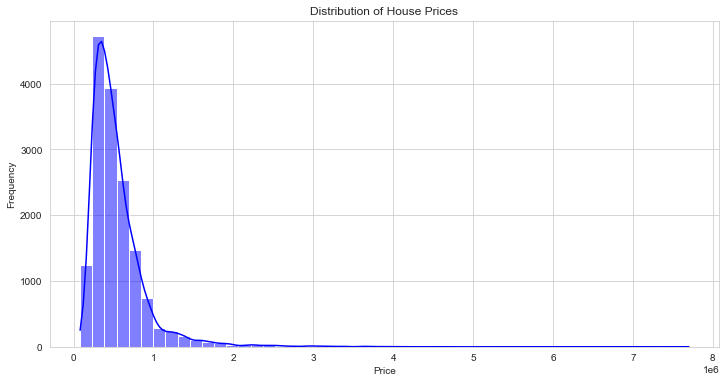

In [13]:
# Checking the distribution of the target variable, which is likely the house price.

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of house prices
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution of house prices is right-skewed, meaning that there are a few houses with extremely high prices compared to the majority. Most of the houses are priced in the lower to mid-range, with a peak around $300,000 to $500,000.

Next, let's explore the relationship between the house price and some potential predictor variables. We'll start by examining how the price varies with:

1. Number of bedrooms
2. Number of bathrooms
3. Living space (sqft_living)
4. House grade

We'll use boxplots to visualize these relationships.

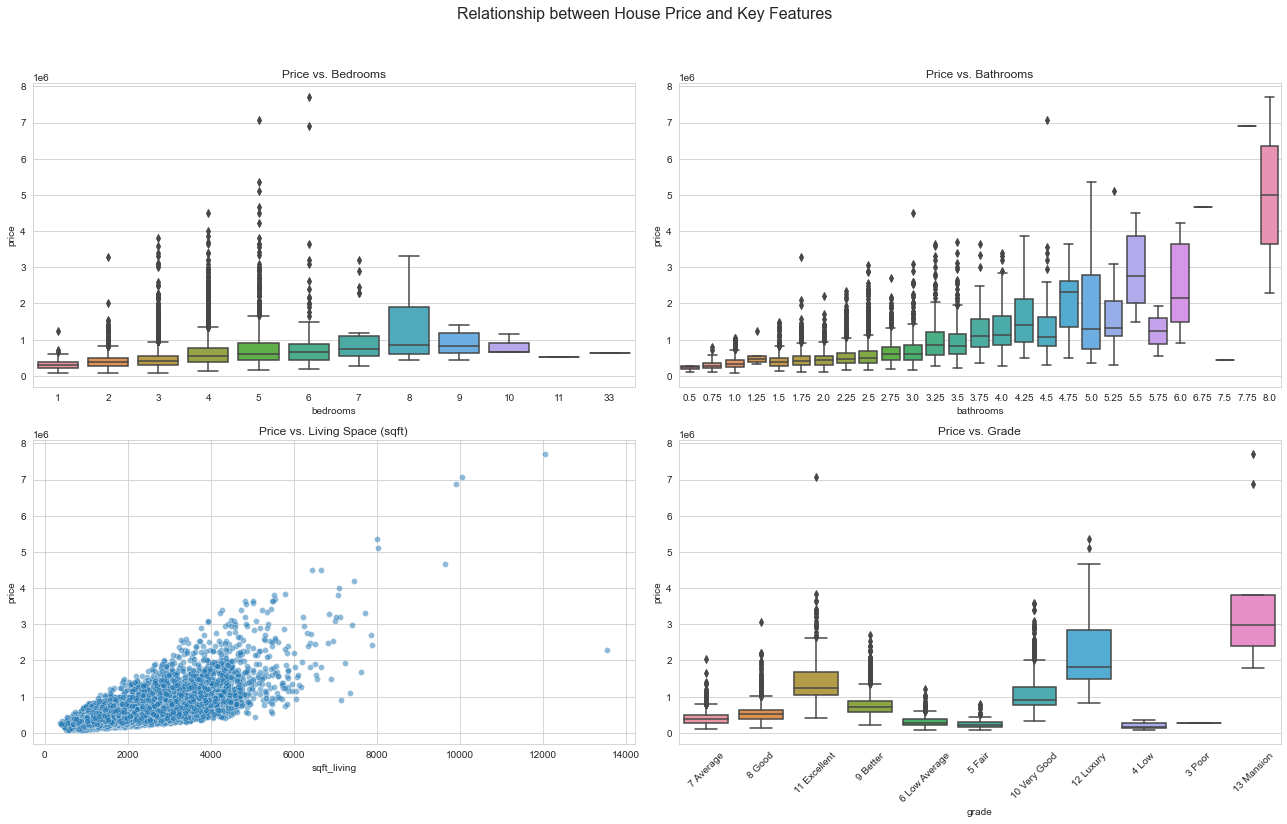

In [14]:
# Setting up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
fig.suptitle('Relationship between House Price and Key Features', fontsize=16)

# Price vs. Bedrooms
sns.boxplot(x='bedrooms', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Price vs. Bedrooms')

# Price vs. Bathrooms
sns.boxplot(x='bathrooms', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Price vs. Bathrooms')

# Price vs. sqft_living
sns.scatterplot(x='sqft_living', y='price', data=df, ax=axes[1, 0], alpha=0.5)
axes[1, 0].set_title('Price vs. Living Space (sqft)')

# Price vs. Grade
sns.boxplot(x='grade', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Price vs. Grade')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Here's a summary of the visualizations:

1. **Price vs. Bedrooms**:
   - Generally, houses with more bedrooms tend to have higher prices. However, there's an outlier with a house that has 33 bedrooms, which seems unusual given its price range.
   
2. **Price vs. Bathrooms**:
   - Houses with more bathrooms generally have higher prices. The trend is evident until around 6-7 bathrooms, after which the price variation becomes more dispersed.
   
3. **Price vs. Living Space (sqft)**:
   - There's a positive correlation between living space (in sqft) and house price. As the living space increases, the house price also tends to increase.
   
4. **Price vs. Grade**:
   - House grade also has a clear impact on price. Higher grade houses generally fetch higher prices. The variation in prices also seems to increase with higher grades.

From the visualizations, it's evident that features like the number of bedrooms, bathrooms, living space, and grade have an influence on house prices.

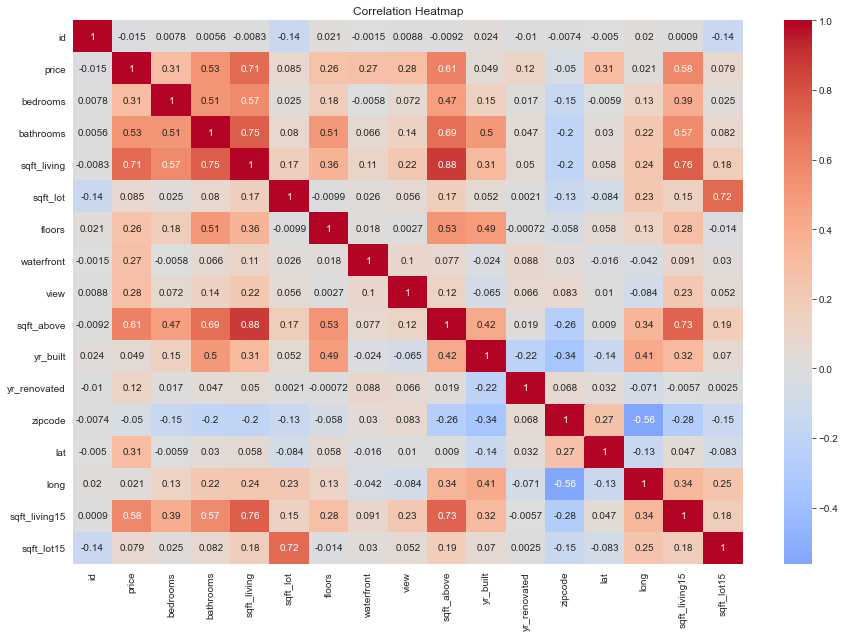

In [15]:
# Investigate which features are correlated 

# Correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize = (15,10))
sns.heatmap(corr, center = 0, annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap')
plt.show()

As expected there are some multicollinearity issues which we need to address.

We note that `sqft_above` and `sqft_living` are highly positively correlated, which is expected as `sqft_above` is the square footage of the house apart from basement (and we saw earlier that most houses did not have a basement). We will choose to keep `sqft_living` as it encompasses more information and drop the `sqt_above` feature. We also see that `sqft_living15` is moderately highly correlated with `sqft_living` and so we will drop this feature too.

We also note that `sqft_lot` and `sqft_lot15` are highly positively correlated and we will choose to keep `sqft_lot` as it relates directly to the house as opposed to its neighbours (and so potentially easier to obtain data for and generalise.)

### Modeling

#### Perform regression analyses: simple, multiple, and polynomial.

## Simple Regression

### Price vs. Living Space (sqft)


We are using sqft15 as the predictor of our target value which is price. We shall start by visualizing the relationship between 'sqft_living15' and 'price' . As the living space increases, the price of the house also seems to increase.



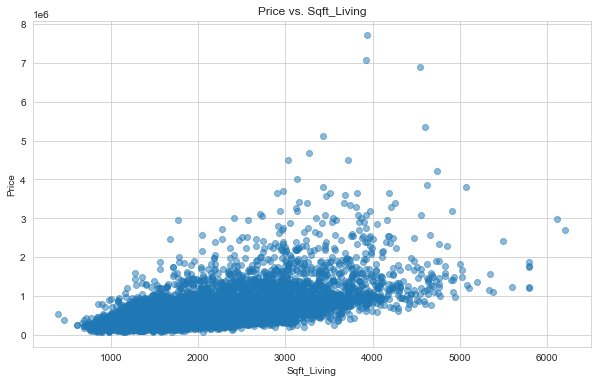

In [16]:
# Scatter plot to visualize the relationship between sqft_living and price
plt.figure(figsize=(10, 6))
plt.scatter(df['sqft_living15'], df['price'], alpha=0.5)
plt.title('Price vs. Sqft_Living')
plt.xlabel('Sqft_Living')
plt.ylabel('Price')
plt.grid(True)
plt.show()

## OLS regression 

In [17]:
X_OLS = df[["sqft_living15"]]
y_OLS = df["price"]

In [18]:
#Creating the Model
model = sm.OLS(endog=y_OLS, exog=sm.add_constant(X_OLS))
model

In [19]:
results = model.fit()
results

In [20]:
results.fvalue, results.f_pvalue

(8054.777705416599, 0.0)

In [21]:
results.rsquared

0.33822602944492586

In [22]:
results.params

const           -88427.432462
sqft_living15      316.419663
dtype: float64

In [23]:
results.pvalues

const            1.319221e-32
sqft_living15    0.000000e+00
dtype: float64

In [24]:
print(results.conf_int())

                           0             1
const         -102970.992770 -73883.872154
sqft_living15     309.509025    323.330301


In [25]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     8055.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:26:27   Log-Likelihood:            -2.2129e+05
No. Observations:               15762   AIC:                         4.426e+05
Df Residuals:                   15760   BIC:                         4.426e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.843e+04   7419.750    -11.918

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     8055.
Date:                Fri, 08 Sep 2023   Prob (F-statistic):               0.00
Time:                        19:26:27   Log-Likelihood:            -2.2129e+05
No. Observations:               15762   AIC:                         4.426e+05
Df Residuals:                   15760   BIC:                         4.426e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -8.843e+04   7419.750    -11.918      0.000   -1.03e+05   -7.39e+04
sqft_living15   316.4197      3.526     89.748      0.000     309.509     323.330
==============================================================================
Omnibus:                    15338.018   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1699755.350
Skew:                           4.462   Prob(JB):                         0.00
Kurtosis:                      53.085   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

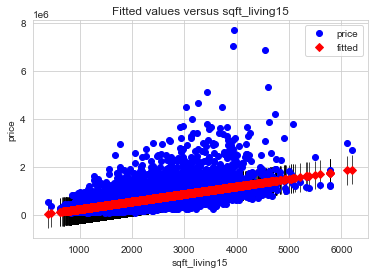

In [27]:
sm.graphics.plot_fit(results, "sqft_living15")
plt.show()

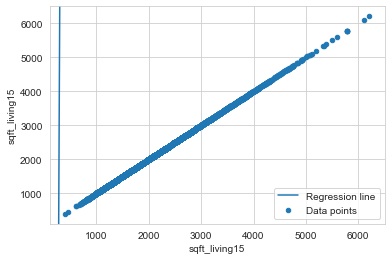

In [28]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living15", y="sqft_living15", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line", ax=ax)
ax.legend();

## SIMPLE LINEAR REGESSION

In [29]:
x = df[["sqft_living15"]]
y = df["price"]

In [30]:
# creating variable for train set and test set for our model. the train set will be 40% of our df

x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.40, random_state = 55)

In [31]:
lm = LinearRegression ()

In [32]:
lm.fit(x_train, y_train)

LinearRegression()

In [33]:
coeff_df =pd.DataFrame(lm.coef_,x.columns,columns =['Coefficient'])

                       

In [34]:
coeff_df

,Coefficient
sqft_living15,333.356412


In [35]:
predictions =lm.predict(x_test)

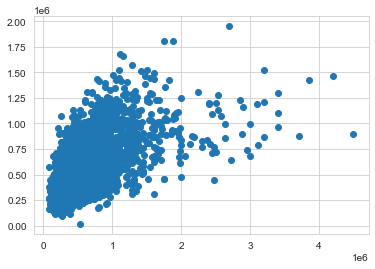

In [36]:
plt.scatter(y_test,predictions)

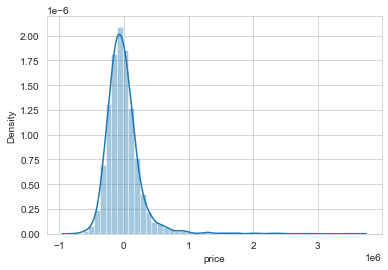

In [37]:
sns.distplot((y_test-predictions), bins =50);